<a href="https://colab.research.google.com/github/21pa1a6146/CREDIT-SCORING-MODEL/blob/main/CREDIT_SCORING_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
ds=pd.read_csv('dataset.csv')

In [4]:
ds.head()

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,CreditHistoryAge,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      100000 non-null  object 
 1   CustomerID              100000 non-null  object 
 2   Month                   100000 non-null  object 
 3   Name                    90015 non-null   object 
 4   Age                     100000 non-null  int64  
 5   SSN                     100000 non-null  object 
 6   Occupation              92938 non-null   object 
 7   AnnualIncome            100000 non-null  float64
 8   MonthlyInhandSalary     84998 non-null   float64
 9   NumBankAccounts         100000 non-null  int64  
 10  NumCreditCard           100000 non-null  int64  
 11  InterestRate            100000 non-null  int64  
 12  NumofLoan               100000 non-null  int64  
 13  TypeofLoan              88592 non-null   object 
 14  Delayfromduedate     

In [6]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,1.106497e+02,6.862447e+02,-5.000000e+02,24.000000,33.000000,42.000000,8.698000e+03
AnnualIncome,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
MonthlyInhandSalary,84998.0,4.194171e+03,3.183686e+03,3.036454e+02,1625.568229,3093.745000,5957.448333,1.520463e+04
NumBankAccounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
NumCreditCard,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.000000,5.000000,7.000000,1.499000e+03
InterestRate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.000000,13.000000,20.000000,5.797000e+03
NumofLoan,100000.0,3.009960e+00,6.264788e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.496000e+03
Delayfromduedate,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
NumofDelayedPayment,92998.0,3.092334e+01,2.260319e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.397000e+03
ChangedCreditLimit,97909.0,1.038903e+01,6.789496e+00,-6.490000e+00,5.320000,9.400000,14.870000,3.697000e+01


In [7]:
ds.isnull().sum()

ID                            0
CustomerID                    0
Month                         0
Name                       9985
Age                           0
SSN                           0
Occupation                 7062
AnnualIncome                  0
MonthlyInhandSalary       15002
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
TypeofLoan                11408
Delayfromduedate              0
NumofDelayedPayment        7002
ChangedCreditLimit         2091
NumCreditInquiries         1965
CreditMix                 20195
OutstandingDebt               0
CreditUtilizationRatio        0
CreditHistoryAge           9030
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      4479
PaymentBehaviour              0
MonthlyBalance             1200
CreditScore                   0
dtype: int64

In [8]:
ds = ds.drop(['ID', 'SSN', 'Name', 'CustomerID','TypeofLoan', 'Occupation','Month'], axis = 1)

In [9]:
ds.isnull().sum()

Age                           0
AnnualIncome                  0
MonthlyInhandSalary       15002
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        7002
ChangedCreditLimit         2091
NumCreditInquiries         1965
CreditMix                 20195
OutstandingDebt               0
CreditUtilizationRatio        0
CreditHistoryAge           9030
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      4479
PaymentBehaviour              0
MonthlyBalance             1200
CreditScore                   0
dtype: int64

In [10]:
ds=ds.dropna()

In [11]:
ds.isnull().sum()

Age                       0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
CreditMix                 0
OutstandingDebt           0
CreditUtilizationRatio    0
CreditHistoryAge          0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
CreditScore               0
dtype: int64

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51930 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     51930 non-null  int64  
 1   AnnualIncome            51930 non-null  float64
 2   MonthlyInhandSalary     51930 non-null  float64
 3   NumBankAccounts         51930 non-null  int64  
 4   NumCreditCard           51930 non-null  int64  
 5   InterestRate            51930 non-null  int64  
 6   NumofLoan               51930 non-null  int64  
 7   Delayfromduedate        51930 non-null  int64  
 8   NumofDelayedPayment     51930 non-null  float64
 9   ChangedCreditLimit      51930 non-null  float64
 10  NumCreditInquiries      51930 non-null  float64
 11  CreditMix               51930 non-null  object 
 12  OutstandingDebt         51930 non-null  float64
 13  CreditUtilizationRatio  51930 non-null  float64
 14  CreditHistoryAge        51930 non-null  obj

In [13]:
Categorical_data = ['CreditMix','CreditHistoryAge','PaymentofMinAmount','PaymentBehaviour','CreditScore']

In [14]:
ds[Categorical_data]

,CreditMix,CreditHistoryAge,PaymentofMinAmount,PaymentBehaviour,CreditScore
6,Good,22 Years and 7 Months,No,LowspentSmallvaluepayments,Good
8,Good,26 Years and 7 Months,No,LowspentSmallvaluepayments,Standard
9,Good,26 Years and 8 Months,No,HighspentLargevaluepayments,Good
12,Good,26 Years and 11 Months,No,LowspentSmallvaluepayments,Good
13,Good,27 Years and 0 Months,No,HighspentLargevaluepayments,Good
...,...,...,...,...,...
99986,Bad,5 Years and 10 Months,Yes,LowspentSmallvaluepayments,Poor
99989,Bad,6 Years and 1 Months,Yes,!@9#%8,Standard
99991,Bad,6 Years and 3 Months,Yes,HighspentLargevaluepayments,Standard
99997,Good,31 Years and 8 Months,No,HighspentLargevaluepayments,Poor


In [15]:
for feature in Categorical_data:
    unique_values = ds[feature].unique()
    print(f"Unique values in {feature}:")
    print(unique_values)

Unique values in CreditMix:
['Good' 'Standard' 'Bad']
Unique values in CreditHistoryAge:
['22 Years and 7 Months' '26 Years and 7 Months' '26 Years and 8 Months'
 '26 Years and 11 Months' '27 Years and 0 Months' '27 Years and 2 Months'
 '17 Years and 9 Months' '17 Years and 10 Months' '18 Years and 1 Months'
 '18 Years and 2 Months' '18 Years and 3 Months' '18 Years and 4 Months'
 '17 Years and 3 Months' '17 Years and 4 Months' '17 Years and 5 Months'
 '17 Years and 6 Months' '17 Years and 7 Months' '30 Years and 10 Months'
 '31 Years and 2 Months' '31 Years and 3 Months' '32 Years and 0 Months'
 '32 Years and 2 Months' '30 Years and 7 Months' '30 Years and 8 Months'
 '30 Years and 9 Months' '30 Years and 11 Months' '21 Years and 4 Months'
 '21 Years and 8 Months' '21 Years and 11 Months' '26 Years and 6 Months'
 '19 Years and 2 Months' '19 Years and 3 Months' '19 Years and 5 Months'
 '19 Years and 6 Months' '19 Years and 7 Months' '19 Years and 8 Months'
 '25 Years and 5 Months' '25 Y

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
#for CreditScore
le = LabelEncoder()
ds['CreditScore'] = le.fit_transform(ds['CreditScore'])

In [18]:
le.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

In [19]:
#for CreditMix
le = LabelEncoder()
ds['CreditMix'] = le.fit_transform(ds['CreditMix'])

In [20]:
le.classes_

array(['Bad', 'Good', 'Standard'], dtype=object)

In [23]:
dcopy = ds

In [24]:
dcopy

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,CreditHistoryAge,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
6,23,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,...,1,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.344067,LowspentSmallvaluepayments,244.565317,0
8,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,...,1,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825,LowspentSmallvaluepayments,470.690627,2
9,28,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,...,1,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,HighspentLargevaluepayments,484.591214,0
12,28,34847.84,3037.986667,2,4,6,1,3,1.0,6.42,...,1,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,LowspentSmallvaluepayments,444.867032,0
13,28,34847.84,3037.986667,2,4,6,1,3,0.0,5.42,...,1,605.03,33.381010,27 Years and 0 Months,No,18.816215,43.477190,HighspentLargevaluepayments,481.505262,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,28,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,...,0,3571.70,24.713861,5 Years and 10 Months,Yes,60.964772,76.282793,LowspentSmallvaluepayments,345.743101,1
99989,28,20002.88,1929.906667,10,8,29,5,33,25.0,16.31,...,0,3571.70,33.359987,6 Years and 1 Months,Yes,60.964772,74.366603,!@9#%8,307.659291,2
99991,29,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,...,0,3571.70,37.140784,6 Years and 3 Months,Yes,60.964772,34.662906,HighspentLargevaluepayments,337.362988,2
99997,25,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,...,1,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,1


In [25]:
def getMonths(duration):
    years, months = int(duration.split()[0]), int(duration.split()[3])
    months += years * 12
    return months

In [26]:
dcopy['CreditHistoryAge'] = dcopy['CreditHistoryAge'].apply(getMonths)

In [27]:
dcopy['CreditHistoryAge']


6        271
8        319
9        320
12       323
13       324
        ... 
99986     70
99989     73
99991     75
99997    380
99999    382
Name: CreditHistoryAge, Length: 51930, dtype: int64

In [28]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51930 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     51930 non-null  int64  
 1   AnnualIncome            51930 non-null  float64
 2   MonthlyInhandSalary     51930 non-null  float64
 3   NumBankAccounts         51930 non-null  int64  
 4   NumCreditCard           51930 non-null  int64  
 5   InterestRate            51930 non-null  int64  
 6   NumofLoan               51930 non-null  int64  
 7   Delayfromduedate        51930 non-null  int64  
 8   NumofDelayedPayment     51930 non-null  float64
 9   ChangedCreditLimit      51930 non-null  float64
 10  NumCreditInquiries      51930 non-null  float64
 11  CreditMix               51930 non-null  int64  
 12  OutstandingDebt         51930 non-null  float64
 13  CreditUtilizationRatio  51930 non-null  float64
 14  CreditHistoryAge        51930 non-null  int

In [29]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(ds['PaymentofMinAmount'].values.reshape(-1, 1))

In [30]:
encoded_ds = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PaymentofMinAmount']))
ds = ds.reset_index(drop=True) # Resetting the index to avoid issues while concatenating
ds= pd.concat([ds, encoded_ds], axis=1)


In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(dcopy['PaymentBehaviour'].values.reshape(-1, 1))
encoded_ds = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PaymentBehaviour']))
ds = dcopy.reset_index(drop=True) # Resetting the index to avoid issues while concatenating
ds= pd.concat([ds, encoded_ds], axis=1)

In [32]:
ds

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,...,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments
0,23,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,...,178.344067,LowspentSmallvaluepayments,244.565317,0,0.0,0.0,0.0,0.0,0.0,1.0
1,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,...,104.291825,LowspentSmallvaluepayments,470.690627,2,0.0,0.0,0.0,0.0,0.0,1.0
2,28,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,...,40.391238,HighspentLargevaluepayments,484.591214,0,1.0,0.0,0.0,0.0,0.0,0.0
3,28,34847.84,3037.986667,2,4,6,1,3,1.0,6.42,...,130.115420,LowspentSmallvaluepayments,444.867032,0,0.0,0.0,0.0,0.0,0.0,1.0
4,28,34847.84,3037.986667,2,4,6,1,3,0.0,5.42,...,43.477190,HighspentLargevaluepayments,481.505262,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51925,28,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,...,76.282793,LowspentSmallvaluepayments,345.743101,1,0.0,0.0,0.0,0.0,0.0,1.0
51926,28,20002.88,1929.906667,10,8,29,5,33,25.0,16.31,...,74.366603,!@9#%8,307.659291,2,0.0,0.0,0.0,0.0,0.0,0.0
51927,29,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,...,34.662906,HighspentLargevaluepayments,337.362988,2,1.0,0.0,0.0,0.0,0.0,0.0
51928,25,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,...,24.028477,HighspentLargevaluepayments,516.809083,1,1.0,0.0,0.0,0.0,0.0,0.0


In [33]:
dcopy

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,CreditHistoryAge,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
6,23,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,...,1,809.98,22.537593,271,No,49.574949,178.344067,LowspentSmallvaluepayments,244.565317,0
8,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,...,1,605.03,24.464031,319,No,18.816215,104.291825,LowspentSmallvaluepayments,470.690627,2
9,28,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,...,1,605.03,38.550848,320,No,18.816215,40.391238,HighspentLargevaluepayments,484.591214,0
12,28,34847.84,3037.986667,2,4,6,1,3,1.0,6.42,...,1,605.03,34.977895,323,No,18.816215,130.115420,LowspentSmallvaluepayments,444.867032,0
13,28,34847.84,3037.986667,2,4,6,1,3,0.0,5.42,...,1,605.03,33.381010,324,No,18.816215,43.477190,HighspentLargevaluepayments,481.505262,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,28,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,...,0,3571.70,24.713861,70,Yes,60.964772,76.282793,LowspentSmallvaluepayments,345.743101,1
99989,28,20002.88,1929.906667,10,8,29,5,33,25.0,16.31,...,0,3571.70,33.359987,73,Yes,60.964772,74.366603,!@9#%8,307.659291,2
99991,29,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,...,0,3571.70,37.140784,75,Yes,60.964772,34.662906,HighspentLargevaluepayments,337.362988,2
99997,25,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,...,1,502.38,41.255522,380,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,1


In [34]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51930 entries, 0 to 51929
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            51930 non-null  int64  
 1   AnnualIncome                                   51930 non-null  float64
 2   MonthlyInhandSalary                            51930 non-null  float64
 3   NumBankAccounts                                51930 non-null  int64  
 4   NumCreditCard                                  51930 non-null  int64  
 5   InterestRate                                   51930 non-null  int64  
 6   NumofLoan                                      51930 non-null  int64  
 7   Delayfromduedate                               51930 non-null  int64  
 8   NumofDelayedPayment                            51930 non-null  float64
 9   ChangedCreditLimit                             519

In [35]:
ds=ds.drop(['PaymentBehaviour','PaymentofMinAmount'],axis=1)

In [36]:
ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51930 entries, 0 to 51929
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Age                                            51930 non-null  int64  
 1   AnnualIncome                                   51930 non-null  float64
 2   MonthlyInhandSalary                            51930 non-null  float64
 3   NumBankAccounts                                51930 non-null  int64  
 4   NumCreditCard                                  51930 non-null  int64  
 5   InterestRate                                   51930 non-null  int64  
 6   NumofLoan                                      51930 non-null  int64  
 7   Delayfromduedate                               51930 non-null  int64  
 8   NumofDelayedPayment                            51930 non-null  float64
 9   ChangedCreditLimit                             519

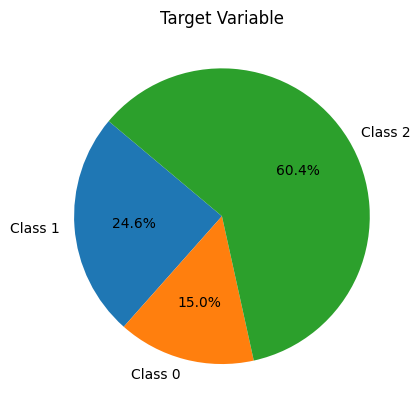

In [37]:
import matplotlib.pyplot as plt

arr_0, arr_1, arr_2 = [], [], []
for i in ds['CreditScore']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)

Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable')
plt.show()

In [38]:
ds['CreditScore']

0        0
1        2
2        0
3        0
4        0
        ..
51925    1
51926    2
51927    2
51928    1
51929    1
Name: CreditScore, Length: 51930, dtype: int64

In [39]:
data_class_1 = ds[ds['CreditScore'] == 1]
data_class_2 = ds[ds['CreditScore'] == 2]
data_class_0 = ds[ds['CreditScore'] == 0]

data_class_1_oversampled = data_class_1.sample(Class_2, replace=True)
data_class_0_oversampled = data_class_0.sample(Class_2, replace=True)


data_oversampled = pd.concat([data_class_2, data_class_1_oversampled], axis=0)
data_oversampled = pd.concat([data_oversampled, data_class_0_oversampled], axis=0)

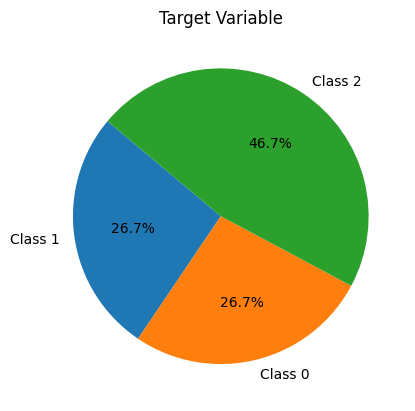

In [40]:
import matplotlib.pyplot as plt

arr_0, arr_1, arr_2 = [], [], []
for i in data_oversampled['CreditScore']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)

Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable')
plt.show()

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

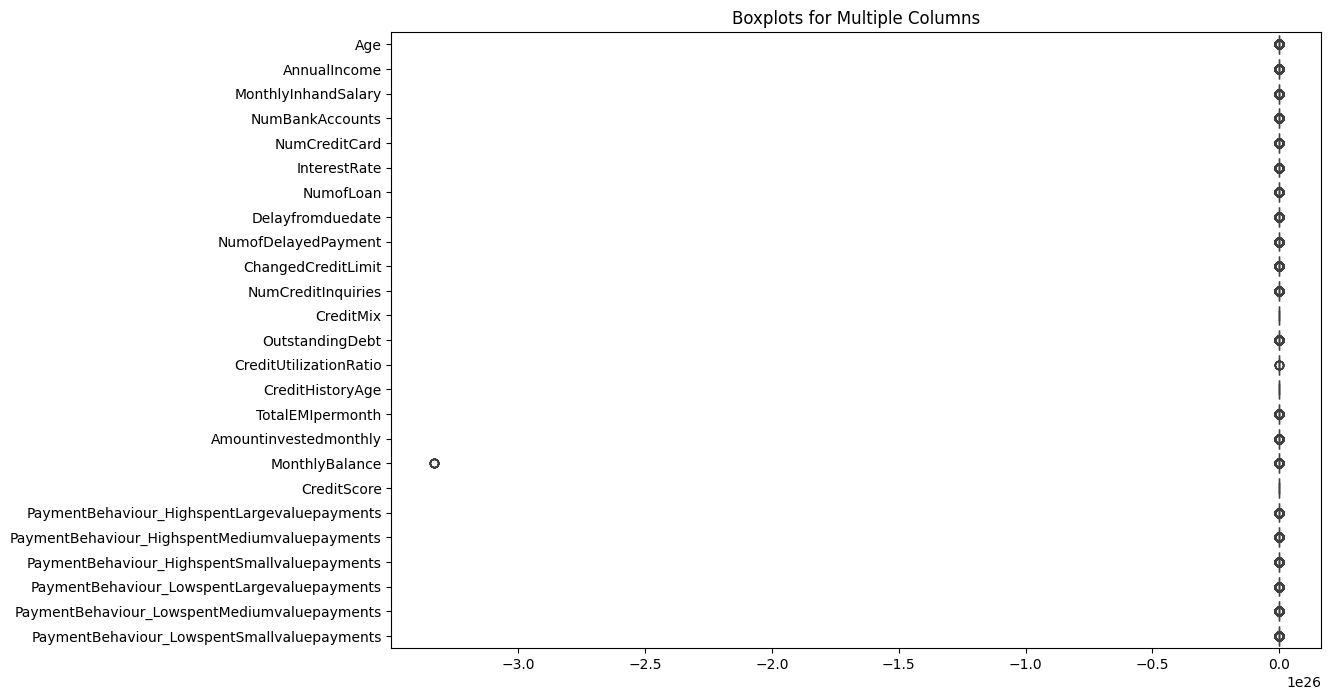

In [41]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=data_oversampled, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

In [42]:
data_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101607 entries, 1 to 28928
Data columns (total 25 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Age                                            101607 non-null  int64  
 1   AnnualIncome                                   101607 non-null  float64
 2   MonthlyInhandSalary                            101607 non-null  float64
 3   NumBankAccounts                                101607 non-null  int64  
 4   NumCreditCard                                  101607 non-null  int64  
 5   InterestRate                                   101607 non-null  int64  
 6   NumofLoan                                      101607 non-null  int64  
 7   Delayfromduedate                               101607 non-null  int64  
 8   NumofDelayedPayment                            101607 non-null  float64
 9   ChangedCreditLimit                         

In [43]:
df = data_oversampled.drop('CreditScore', axis = 1)

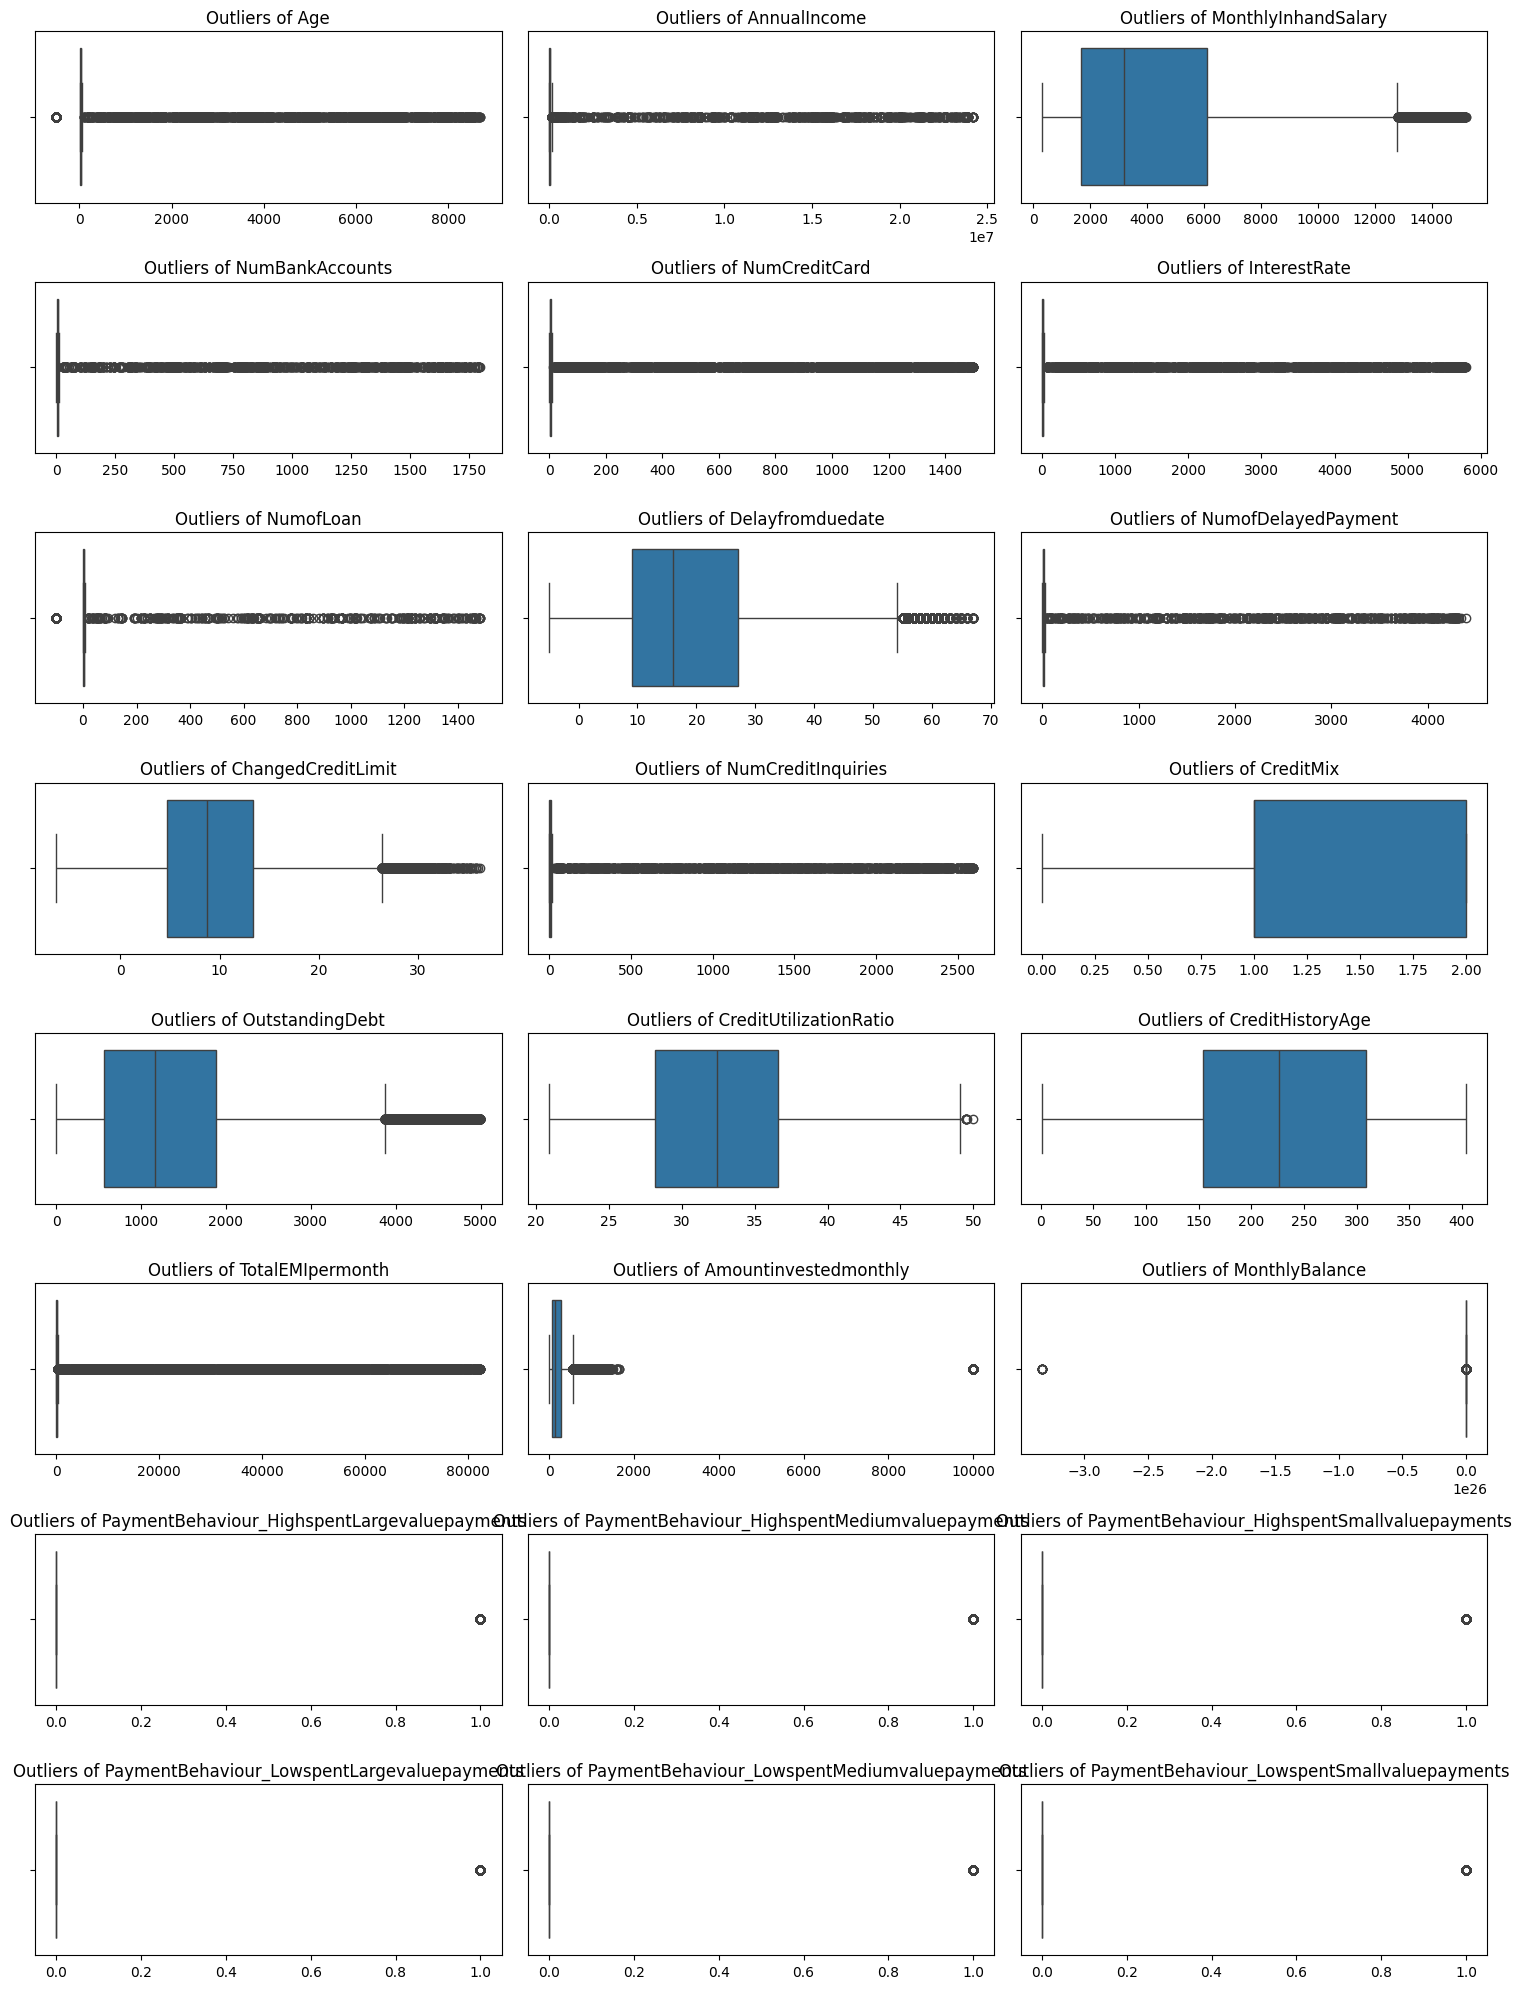

In [44]:
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flattenning the axes
axes = axes.ravel()

i = -1
for feature in df.columns:
    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Outliers of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
#     i += 1

#     ax = axes[i]
#     df[feature] = yeojohnson(df[feature])[0]
#     sns.histplot(df[feature], kde=True, ax=ax)
#     ax.set_title(f'Distribution of Transformed {feature}')
#     ax.set_xlabel('')
#     ax.set_ylabel('')

for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [45]:
df['CreditScore'] = data_oversampled['CreditScore']

In [46]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(df < (Q1 - 1.5 * IQR) |(df > (Q3 + 1.5 * IQR)))

         Age  AnnualIncome  MonthlyInhandSalary  NumBankAccounts  \
1      False         False                False            False   
10     False         False                False            False   
11     False         False                False            False   
12     False         False                False            False   
13     False         False                False            False   
...      ...           ...                  ...              ...   
5626   False         False                False            False   
28614  False         False                False            False   
20737  False         False                False            False   
23114  False         False                False            False   
28928  False         False                False            False   

       NumCreditCard  InterestRate  NumofLoan  Delayfromduedate  \
1              False         False      False             False   
10             False         False      False    

In [47]:
s = set([
    'PaymentofMinAmount_No',
    'PaymentofMinAmount_Yes',
    'PaymentBehaviour_HighspentLargevaluepayments',
    'PaymentBehaviour_HighspentMediumvaluepayments',
    'PaymentBehaviour_HighspentSmallvaluepayments',
    'PaymentBehaviour_LowspentLargevaluepayments',
    'PaymentBehaviour_LowspentMediumvaluepayments',
    'PaymentBehaviour_LowspentSmallvaluepayments',
    'Age',
    'NumBankAccounts',
    'NumCreditCard',
    'InterestRate',
    'NumofLoan',
    'NumofDelayedPayment',
    'NumCreditInquiries'
])


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for column in df.columns:
    if column in s:
        continue
    df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

print(df)

       Age  AnnualIncome  MonthlyInhandSalary  NumBankAccounts  NumCreditCard  \
1       28     34847.840          3037.986667                2              4   
12      54     30689.890          2612.490833                2              5   
13      54     30689.890          2612.490833                2              5   
14      55     30689.890          2612.490833                2              5   
15      55     30689.890          2612.490833                2              5   
...    ...           ...                  ...              ...            ...   
24902   31     10455.875           729.322917                6              5   
5626    44     32012.650          2562.319063                4              5   
28614   52     37452.590          2962.049167                4              3   
23114   48     18622.570          1766.880833                3              3   
28928   41     23129.880          1735.490000                5              3   

       InterestRate  NumofL

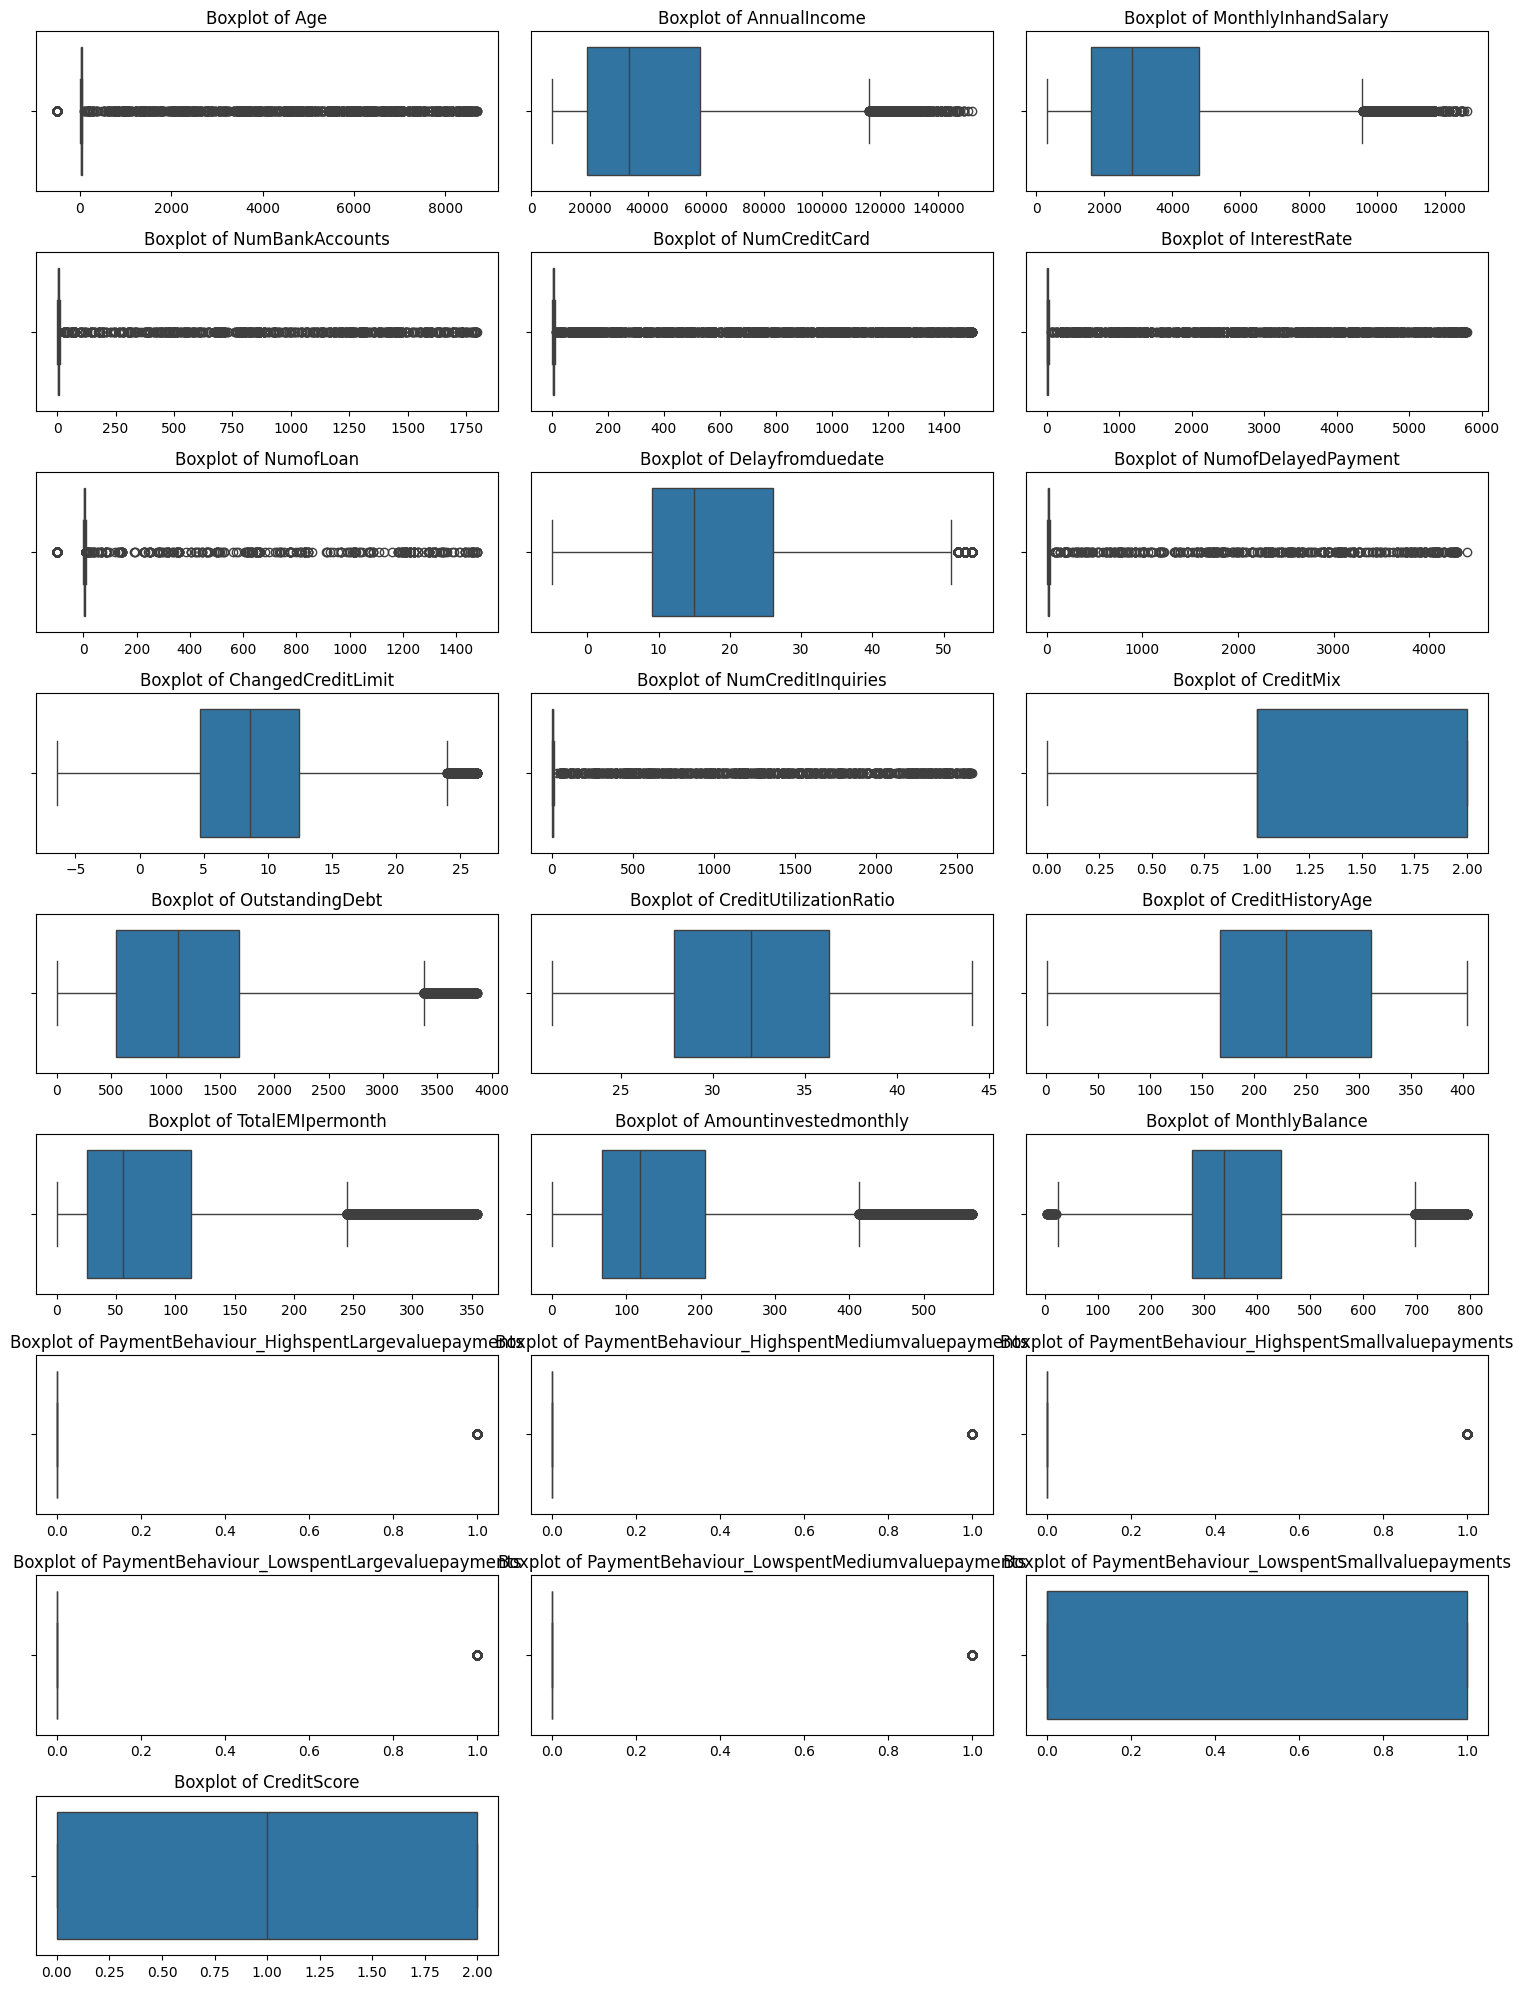

In [48]:
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flattenning the axes
axes = axes.ravel()

i = -1

for feature in df.columns:

    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
#     i += 1

#     ax = axes[i]
#     df[feature] = yeojohnson(df[feature])[0]
#     sns.histplot(df[feature], kde=True, ax=ax)
#     ax.set_title(f'Distribution of Transformed {feature}')
#     ax.set_xlabel('')
#     ax.set_ylabel('')

for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [49]:
df.reset_index(drop=True)


,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,...,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments,CreditScore
0,28,34847.840,3037.986667,2,4,6,1,3,4.0,5.42,...,18.816215,104.291825,470.690627,0.0,0.0,0.0,0.0,0.0,1.0,2
1,54,30689.890,2612.490833,2,5,4,1,0,6.0,1.99,...,16.415452,81.228859,433.604773,0.0,0.0,0.0,1.0,0.0,0.0,2
2,54,30689.890,2612.490833,2,5,4,1,5,3.0,1.99,...,16.415452,124.881820,409.951812,0.0,0.0,0.0,0.0,0.0,1.0,2
3,55,30689.890,2612.490833,2,5,4,1,3,9.0,1.99,...,16.415452,83.406509,411.427123,0.0,1.0,0.0,0.0,0.0,0.0,2
4,55,30689.890,2612.490833,2,5,4,1,7,6.0,-2.01,...,16.415452,272.334037,262.499594,0.0,0.0,0.0,0.0,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69083,31,10455.875,729.322917,6,5,12,3,11,21.0,8.71,...,25.748448,22.880776,284.303068,0.0,0.0,1.0,0.0,0.0,0.0,0
69084,44,32012.650,2562.319063,4,5,9,3,7,5.0,2.84,...,223.966029,153.014580,344.593244,0.0,0.0,0.0,0.0,0.0,1.0,0
69085,52,37452.590,2962.049167,4,3,1,1,7,9.0,4.11,...,29.054273,45.066039,472.084605,0.0,1.0,0.0,0.0,0.0,0.0,0
69086,48,18622.570,1766.880833,3,3,5418,3,2,1.0,4.85,...,30.635718,64.577808,341.474558,0.0,0.0,1.0,0.0,0.0,0.0,0


Text(0.5, 1.0, 'Boxplots for Multiple Columns')

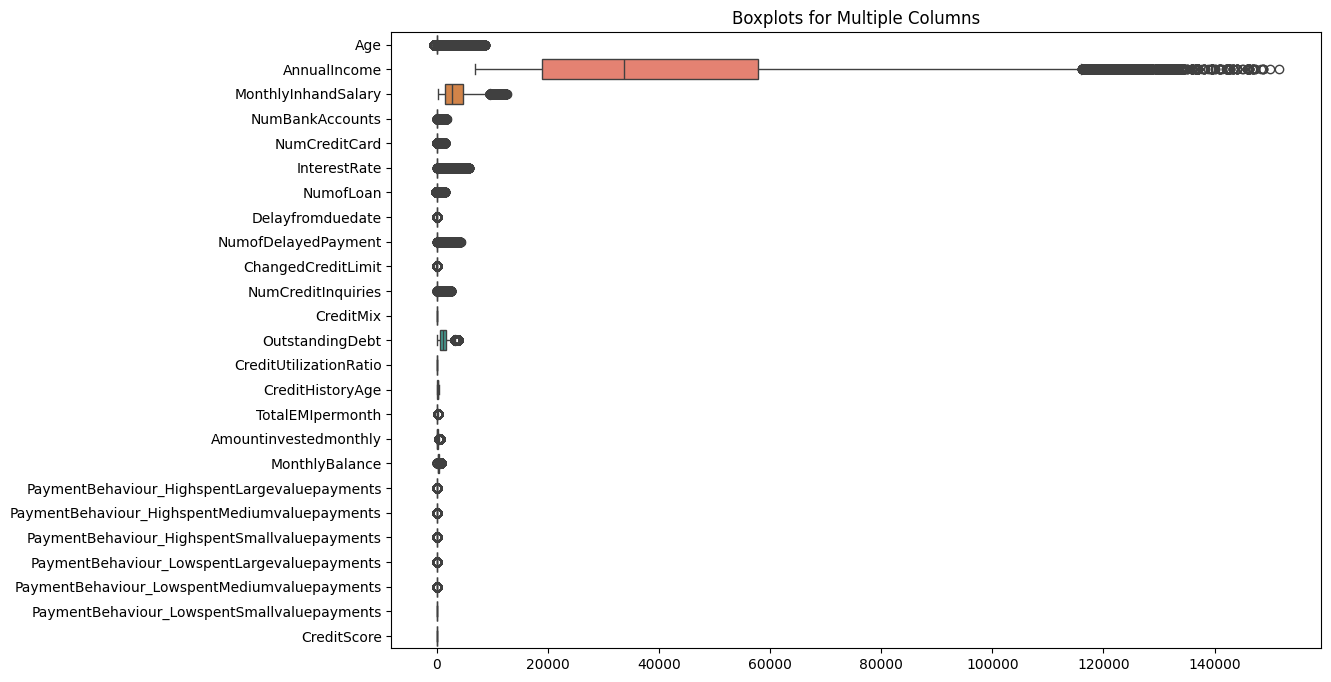

In [50]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=df, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

In [51]:
df_without_outliers  = df.copy()

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

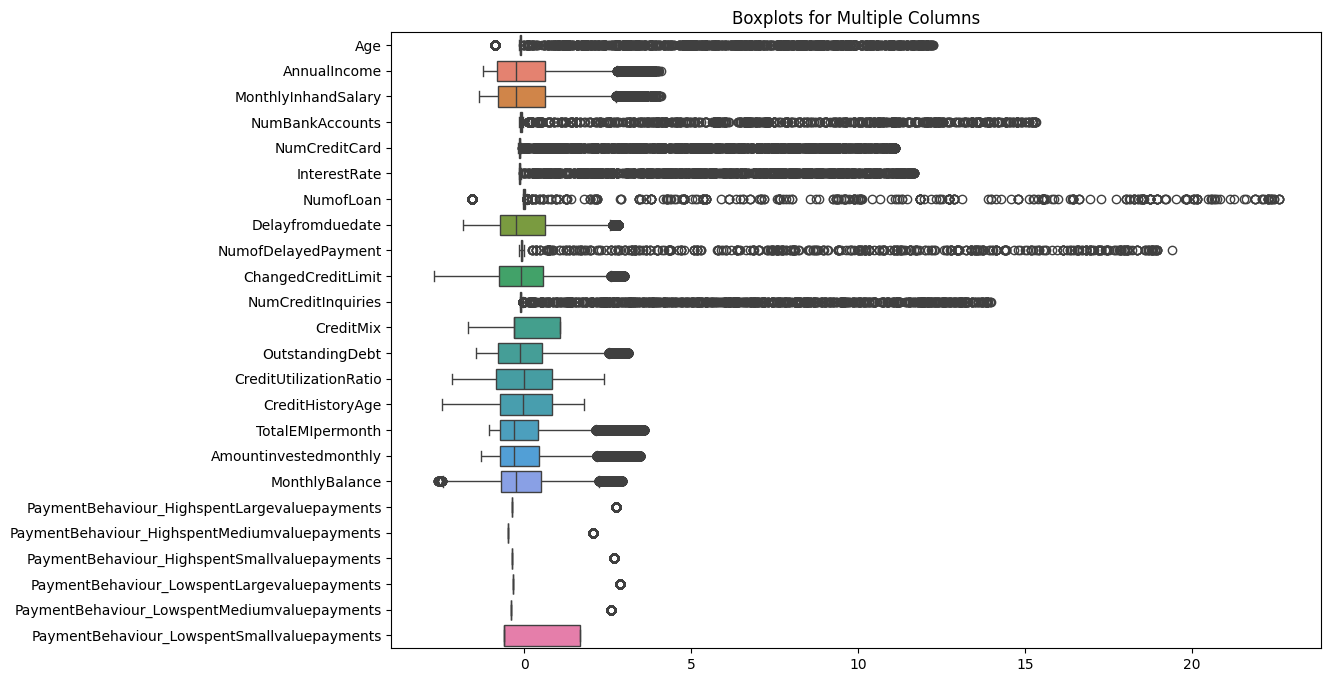

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df_without_outliers.drop('CreditScore', axis = 1))
data_oversampled_normalized_without_outliers = sc.transform(df_without_outliers.drop('CreditScore', axis = 1))
data_oversampled_normalized_without_outliers = pd.DataFrame(data_oversampled_normalized_without_outliers, columns = df_without_outliers.drop('CreditScore', axis = 1).columns)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=data_oversampled_normalized_without_outliers, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

In [53]:

data_oversampled_normalized_without_outliers = pd.DataFrame(data_oversampled_normalized_without_outliers, columns=df_without_outliers.columns.difference(['CreditScore']))

In [54]:
data_oversampled_normalized_without_outliers['CreditScore'] = df_without_outliers.reset_index()['CreditScore']

In [55]:
data_oversampled_normalized_without_outliers

,Age,Amountinvestedmonthly,AnnualIncome,ChangedCreditLimit,CreditHistoryAge,CreditMix,CreditUtilizationRatio,Delayfromduedate,InterestRate,MonthlyBalance,...,NumofLoan,OutstandingDebt,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments,TotalEMIpermonth,CreditScore
0,-0.124581,-0.426982,-0.217252,-0.645546,0.899493,-0.319371,-1.520970,-1.201764,-0.144058,0.667414,...,-0.027455,-0.721819,-0.364843,-0.483281,-0.372215,-0.347476,-0.383,1.68104,-0.810383,2
1,-0.087506,-0.621977,-0.371019,-1.242818,-0.287429,-0.319371,-1.105286,-1.437800,-0.148144,0.409214,...,-0.027455,-0.689514,-0.364843,-0.483281,-0.372215,2.877895,-0.383,-0.59487,-0.841820,2
2,-0.087506,-0.252896,-0.371019,-1.242818,-0.276831,-0.319371,0.640368,-1.044406,-0.148144,0.244537,...,-0.027455,-0.689514,-0.364843,-0.483281,-0.372215,-0.347476,-0.383,1.68104,-0.841820,2
3,-0.086080,-0.603565,-0.371019,-1.242818,-0.266234,-0.319371,0.045115,-1.201764,-0.148144,0.254808,...,-0.027455,-0.689514,-0.364843,2.069191,-0.372215,-0.347476,-0.383,-0.59487,-0.841820,2
4,-0.086080,0.993796,-0.371019,-1.939346,-0.255636,-0.319371,1.210353,-0.887049,-0.148144,-0.782059,...,-0.027455,-0.689514,-0.364843,-0.483281,-0.372215,-0.347476,-0.383,1.68104,-0.841820,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69083,-0.120303,-1.115303,-1.119301,-0.072651,0.454397,-0.319371,0.365267,-0.572334,-0.131801,-0.630258,...,0.003165,-1.336445,-0.364843,-0.483281,2.686618,-0.347476,-0.383,-0.59487,-0.719607,0
69084,-0.101765,-0.015037,-0.322102,-1.094806,0.157667,-0.319371,-1.280091,-0.887049,-0.137930,-0.210504,...,0.003165,-1.425623,-0.364843,-0.483281,-0.372215,-0.347476,-0.383,1.68104,1.876016,0
69085,-0.090358,-0.927729,-0.120925,-0.873658,0.136472,-0.319371,-1.240133,-0.887049,-0.154273,0.677120,...,-0.027455,0.080656,-0.364843,2.069191,-0.372215,-0.347476,-0.383,-0.59487,-0.676317,0
69086,-0.096062,-0.762760,-0.817285,-0.744801,1.598929,-0.319371,0.009410,-1.280443,10.912030,-0.232217,...,0.003165,-1.295907,-0.364843,-0.483281,2.686618,-0.347476,-0.383,-0.59487,-0.655609,0


In [56]:
df2 = data_oversampled_normalized_without_outliers.copy()

In [57]:
df2

,Age,Amountinvestedmonthly,AnnualIncome,ChangedCreditLimit,CreditHistoryAge,CreditMix,CreditUtilizationRatio,Delayfromduedate,InterestRate,MonthlyBalance,...,NumofLoan,OutstandingDebt,PaymentBehaviour_HighspentLargevaluepayments,PaymentBehaviour_HighspentMediumvaluepayments,PaymentBehaviour_HighspentSmallvaluepayments,PaymentBehaviour_LowspentLargevaluepayments,PaymentBehaviour_LowspentMediumvaluepayments,PaymentBehaviour_LowspentSmallvaluepayments,TotalEMIpermonth,CreditScore
0,-0.124581,-0.426982,-0.217252,-0.645546,0.899493,-0.319371,-1.520970,-1.201764,-0.144058,0.667414,...,-0.027455,-0.721819,-0.364843,-0.483281,-0.372215,-0.347476,-0.383,1.68104,-0.810383,2
1,-0.087506,-0.621977,-0.371019,-1.242818,-0.287429,-0.319371,-1.105286,-1.437800,-0.148144,0.409214,...,-0.027455,-0.689514,-0.364843,-0.483281,-0.372215,2.877895,-0.383,-0.59487,-0.841820,2
2,-0.087506,-0.252896,-0.371019,-1.242818,-0.276831,-0.319371,0.640368,-1.044406,-0.148144,0.244537,...,-0.027455,-0.689514,-0.364843,-0.483281,-0.372215,-0.347476,-0.383,1.68104,-0.841820,2
3,-0.086080,-0.603565,-0.371019,-1.242818,-0.266234,-0.319371,0.045115,-1.201764,-0.148144,0.254808,...,-0.027455,-0.689514,-0.364843,2.069191,-0.372215,-0.347476,-0.383,-0.59487,-0.841820,2
4,-0.086080,0.993796,-0.371019,-1.939346,-0.255636,-0.319371,1.210353,-0.887049,-0.148144,-0.782059,...,-0.027455,-0.689514,-0.364843,-0.483281,-0.372215,-0.347476,-0.383,1.68104,-0.841820,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69083,-0.120303,-1.115303,-1.119301,-0.072651,0.454397,-0.319371,0.365267,-0.572334,-0.131801,-0.630258,...,0.003165,-1.336445,-0.364843,-0.483281,2.686618,-0.347476,-0.383,-0.59487,-0.719607,0
69084,-0.101765,-0.015037,-0.322102,-1.094806,0.157667,-0.319371,-1.280091,-0.887049,-0.137930,-0.210504,...,0.003165,-1.425623,-0.364843,-0.483281,-0.372215,-0.347476,-0.383,1.68104,1.876016,0
69085,-0.090358,-0.927729,-0.120925,-0.873658,0.136472,-0.319371,-1.240133,-0.887049,-0.154273,0.677120,...,-0.027455,0.080656,-0.364843,2.069191,-0.372215,-0.347476,-0.383,-0.59487,-0.676317,0
69086,-0.096062,-0.762760,-0.817285,-0.744801,1.598929,-0.319371,0.009410,-1.280443,10.912030,-0.232217,...,0.003165,-1.295907,-0.364843,-0.483281,2.686618,-0.347476,-0.383,-0.59487,-0.655609,0


In [58]:
X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
from sklearn.linear_model import LogisticRegression

# Using the One vs Rest approach
logistic_regression_model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
logistic_regression_model_ovr.fit(X_train, y_train)
y_pred_ovr = logistic_regression_model_ovr.predict(X_test)

# using the Multinomial Regression employing the softmax approach
logistic_regression_model_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_regression_model_multinomial.fit(X_train, y_train)
y_pred_multinomial = logistic_regression_model_multinomial.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluating the One vs Rest Model
print("OvR Model:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_ovr):.2f}')

# Evaluating the Softmax (Multinomial) Model
print("\nSoftmax (Multinomial) Model:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_multinomial):.2f}')

OvR Model:
Accuracy: 0.72

Softmax (Multinomial) Model:
Accuracy: 0.72


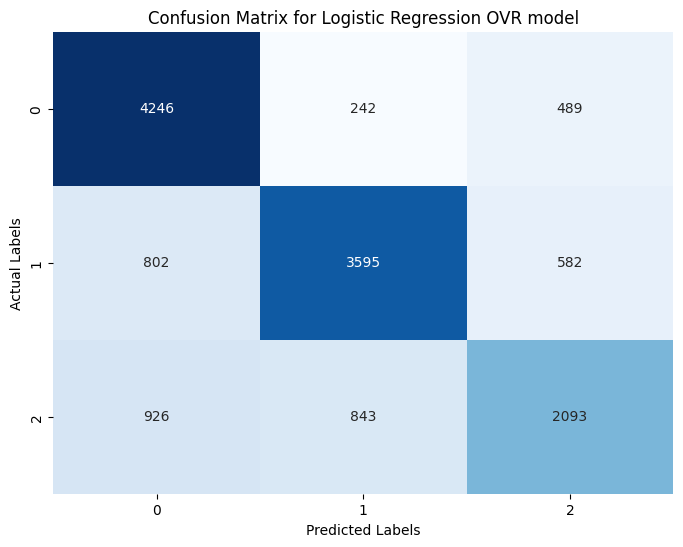

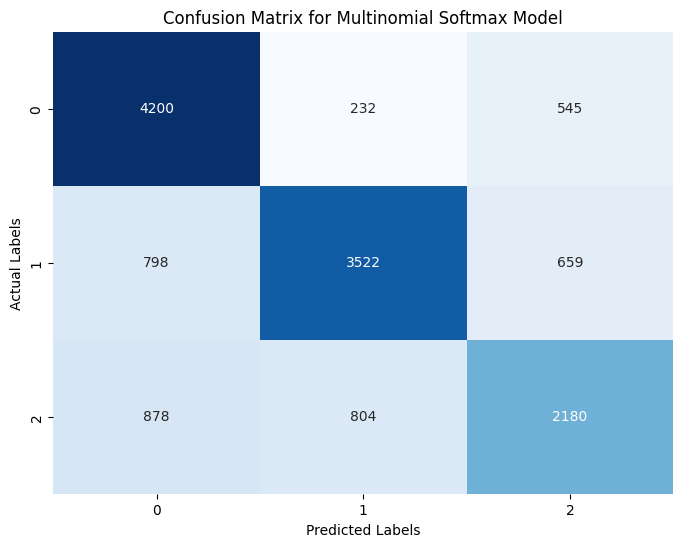

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ovr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Logistic Regression OVR model')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_multinomial), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Multinomial Softmax Model')
plt.show()